# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4: Web Scraping Job Postings

## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

---

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

---

## Requirements

1. Scrape and prepare your own data.

2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
   - Section 1: Job Salary Trends
   - Section 2: Job Category Factors

3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
   - Make sure to clearly describe and label each section.
   - Comment on your code so that others could, in theory, replicate your work.

4. A brief writeup in an executive summary, written for a non-technical audience.
   - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

#### BONUS

5. Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions.

6. Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

---

## Suggestions for Getting Started

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
5. If tackling the bonus question, try framing the salary problem as a classification problem detecting low vs. high salary positions.

---

## Useful Resources

- Scraping is one of the most fun, useful and interesting skills out there. Don’t lose out by copying someone else's code!
- [Here is some advice on how to write for a non-technical audience](http://programmers.stackexchange.com/questions/11523/explaining-technical-things-to-non-technical-people)
- [Documentation for BeautifulSoup can be found here](http://www.crummy.com/software/BeautifulSoup/).

---

### Project Feedback + Evaluation

For all projects, students will be evaluated on a simple 3 point scale (0, 1, or 2). Instructors will use this rubric when scoring student performance on each of the core project **requirements:** 

Score | Expectations
----- | ------------
**0** | _Does not meet expectations. Try again._
**1** | _Meets expectations. Good job._
**2** | _Surpasses expectations. Brilliant!_

[For more information on how we grade our DSI projects, see our project grading walkthrough.](https://git.generalassemb.ly/dsi-projects/readme/blob/master/README.md)


Question 1

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('./project4_data.csv', index_col = 0)
df.head()

,company,position,job_id,location,employment_type,job_level,min_experience,job_category,salary,salary_type,role_responsibility,requirement
0,NATIONAL UNIVERSITY OF SINGAPORE,Postdoctoral Fellow / Research Fellow (Data An...,JOB-2019-0065979,21 LOWER KENT RIDGE ROAD 119077,Contract,Professional,3 years exp,Sciences / Laboratory / R&D,"$5,000to$6,500",Monthly,Post-doctoral Research Fellow (Data Analytics)...,• Possess a Master or PhD in a relevant field ...
1,CTRLSHIFT SINGAPORE PTE. LTD.,Data Scientist,JOB-2019-0024152,"INFINITE STUDIOS, 21 MEDIA CIRCLE 138562",Permanent,Senior Executive,2 years exp,"Advertising / Media , Information Technology, ...","$3,000to$10,000",Monthly,Build models with assistance and perform expl...,PhD/Master’s /Bachelors degree in Computer Sc...
2,RIO TINTO COMMERCIAL PTE. LTD.,Senior Data Scientist,JOB-2019-0090665,"MARINA BAY FINANCIAL CENTRE, 12 MARINA BOULEVA...","Permanent, Full Time",Professional,8 years exp,"Information Technology, Logistics / Supply Chain","$12,000to$23,000",Monthly,Our vision is to build a unified Commercial Di...,Experience: Techniques like: Statistics based...
3,HITACHI CONSULTING SINGAPORE PTE. LTD.,Senior Consultant (Data Scientist),JOB-2019-0089896,"PLAZA 8 @ CBP, 1 CHANGI BUSINESS PARK CRESCENT...","Permanent, Contract",Senior Executive,NaN,Information Technology,"$6,000to$9,000",Monthly,Problem solver with curious mindset with a hi...,Sound knowledge of machine learning concepts....
4,TRAVELOKA SERVICES PTE. LTD.,Data Science Lead,JOB-2019-0089680,NaN,Full Time,Manager,NaN,Information Technology,"$10,000to$15,000",Monthly,"As a Data scientist, you play a key role to so...",We are looking for someone with: Passion in b...


In [61]:
# Remove same job postings based on job_id

df = df.drop_duplicates(['job_id'])

In [62]:
# Check the number of jobs and features

df.shape

(1250, 12)

In [63]:
# Check the data type of each feature

df.dtypes

company                object
position               object
job_id                 object
location               object
employment_type        object
job_level              object
min_experience         object
job_category           object
salary                 object
salary_type            object
role_responsibility    object
requirement            object
dtype: object

In [64]:
# Check the null entries of each feature

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 0 to 1491
Data columns (total 12 columns):
company                1249 non-null object
position               1249 non-null object
job_id                 1249 non-null object
location               989 non-null object
employment_type        1249 non-null object
job_level              1228 non-null object
min_experience         78 non-null object
job_category           1249 non-null object
salary                 1148 non-null object
salary_type            1149 non-null object
role_responsibility    1249 non-null object
requirement            1177 non-null object
dtypes: object(12)
memory usage: 127.0+ KB


In [65]:
df.isnull().sum()[df.isnull().sum() != 0]

company                   1
position                  1
job_id                    1
location                261
employment_type           1
job_level                22
min_experience         1172
job_category              1
salary                  102
salary_type             101
role_responsibility       1
requirement              73
dtype: int64

In [66]:
df[df['company'].isnull()]

,company,position,job_id,location,employment_type,job_level,min_experience,job_category,salary,salary_type,role_responsibility,requirement
157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# Remove row as all information are NaN

df = df.drop(157, axis = 0)

In [68]:
# Remove min_experience column as majority are NaN

df = df.drop(['min_experience'], axis = 1)

In [69]:
# Remove rows where salary is NaN

df = df.dropna(subset = ['salary'], axis = 0)

In [70]:
# Check the null entries of each feature again

df.isnull().sum()[df.isnull().sum() != 0]

location       223
job_level        1
requirement     43
dtype: int64

In [71]:
# Remove row where job_level is NaN

df = df.dropna(subset = ['job_level'], axis = 0)

In [72]:
# Check the null entries of each feature again

df.isnull().sum()[df.isnull().sum() != 0]

location       223
requirement     42
dtype: int64

In [73]:
# Check the number of jobs and features again

df.shape

(1147, 11)

In [74]:
# Create target column mean_salary

df[['salary_lower','salary_upper']] = df['salary'].str.split('to', expand = True,)
df[['salary_lower', 'salary_upper']] = df[['salary_lower', 'salary_upper']].astype(str)
df[['salary_lower', 'salary_upper']] = df[['salary_lower', 'salary_upper']].replace({'\$': '', ',': ''}, regex = True)
df[['salary_lower', 'salary_upper']] = df[['salary_lower', 'salary_upper']].astype(int)

df.loc[df['salary_type'] == 'Annually', 'salary_lower'] = df['salary_lower']/12
df.loc[df['salary_type'] == 'Annually', 'salary_upper'] = df['salary_upper']/12

df['mean_salary'] = (df['salary_lower'] + df['salary_upper'])/2

In [75]:
df.describe()

,salary_lower,salary_upper,mean_salary
count,1147.000000,1147.000000,1147.000000
mean,5412.996513,8473.383319,6943.189916
std,2302.077786,4577.449460,3175.901305
min,800.000000,1200.000000,1000.000000
25%,4000.000000,6000.000000,5000.000000
50%,5000.000000,8000.000000,6500.000000
75%,6500.000000,10000.000000,8250.000000
max,22916.666667,75000.000000,40000.000000


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1, 'Distribution of Lower End of Salary')

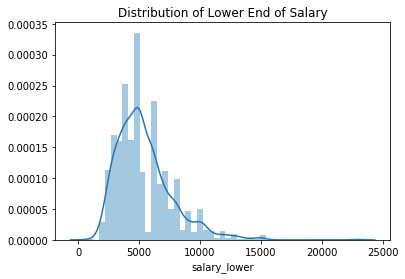

In [76]:
ax = sns.distplot(df['salary_lower'])
ax.set_title('Distribution of Lower End of Salary', y = 1) 

Text(0.5, 1, 'Distribution of Upper End of Salary')

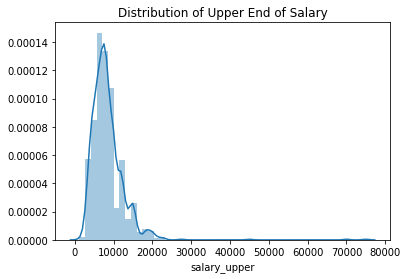

In [77]:
ax = sns.distplot(df['salary_upper'])
ax.set_title('Distribution of Upper End of Salary', y = 1) 

Text(0.5, 1, 'Distribution of Mean Salary')

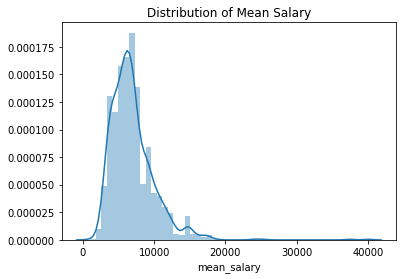

In [78]:
ax = sns.distplot(df['mean_salary']) 
ax.set_title('Distribution of Mean Salary', y = 1) 

In [79]:
df[df['mean_salary'] >= 20000]

,company,position,job_id,location,employment_type,job_level,job_category,salary,salary_type,role_responsibility,requirement,salary_lower,salary_upper,mean_salary
521,GATEWAY SEARCH PTE. LTD.,Sr Sitecore Developer,JOB-2019-0081258,"MARINA ONE WEST TOWER, 9 STRAITS VIEW 018937",Permanent,Senior Executive,Information Technology,"$5,000to$75,000",Monthly,Job Description Minimum 2 years of applicatio...,"2 years’ experience in designing, developing,...",5000.000000,75000.0,40000.000000
686,INFINEON TECHNOLOGIES ASIA PACIFIC PTE LTD,Business Analyst - Factory Integration,JOB-2019-0069111,"INFINEON, 8 KALLANG SECTOR 349282",Permanent,"Professional, Junior Executive",Information Technology,"$3,000to$45,000",Monthly,In your new role you will: Be performing Da...,You are best equipped for this task if you hav...,3000.000000,45000.0,24000.000000
768,SAMSUNG SDS ASIA PACIFIC PTE. LTD.,Assistant Manager / Manager,JOB-2019-0085229,"MAPLETREE BUSINESS CITY, 30 PASIR PANJANG ROAD...",Permanent,Senior Executive,Others,"$5,000to$70,000",Monthly,Compile complex data sets from a variety of...,"Bachelor's degree in Mathematics, Computer Sc...",5000.000000,70000.0,37500.000000
818,S.W.I.F.T. TERMINAL SERVICES PTE. LTD.,MANAGERIAL / SENIOR MANAGEMENT,JOB-2019-0073800,80 ROBINSON ROAD 068898,Permanent,"Senior Management, Manager",Banking and Finance,"$275,000to$330,000",Annually,Job Title: Senior Product/Market Manager SWI...,Responsibilities: Your responsibilities will b...,22916.666667,27500.0,25208.333333


In [80]:
# Take median of mean_salary as benchmark between high and low salary

df['mean_salary_class'] = df['mean_salary'].map(lambda x:1 if x >= 6500 else 0)

In [81]:
# Baseline

df['mean_salary_class'].value_counts()/len(df)

1    0.508282
0    0.491718
Name: mean_salary_class, dtype: float64

In [82]:
# Check position

df['position'].value_counts()[:10]

Business Analyst                                                            65
Data Scientist                                                              46
Data Engineer                                                               27
Research Fellow                                                             25
Senior Business Analyst                                                     20
Data Engineer (5 days, Orchard, $3500-4000)                                 19
Net Programmer [Ms SQL / .Net framework / C# / VB.NET / SDLC / Software]    14
Research Associate                                                          13
Data Analyst                                                                12
Software Developer                                                          10
Name: position, dtype: int64

In [83]:
df['position'] = df['position'].str.lower()

position = []
for i in df['position']:
    if 'analyst' in i:
        position.append('analyst')
    elif 'scientist' in i:
        position.append('scientist')
    elif 'engineer' in i:
        position.append('engineer')
    elif 'research' in i:
        position.append('researcher')
    elif 'programmer' in i:
        position.append('programmer')
    elif 'developer' in i:
        position.append('developer')
    elif 'architect' in i:
        position.append('architect')
    elif 'consultant' in i:
        position.append('consultant')
    elif 'executive' in i:
        position.append('executive')
    elif 'manager' in i:
        position.append('manager')
    elif 'science' in i:
        position.append('scientist')
    elif 'designer' in i:
        position.append('architect')
    elif 'adminstrator' in i:
        position.append('adminstrator')     
    elif 'admin' in i:
        position.append('adminstrator') 
    else:
        position.append('others')
        
df['position'] = position

In [84]:
df['position'].value_counts()

analyst         382
engineer        233
developer       107
others          105
scientist       100
researcher       61
manager          47
consultant       47
architect        27
programmer       14
adminstrator     13
executive        11
Name: position, dtype: int64

Text(0.5, 1, 'Mean Salary by Position')

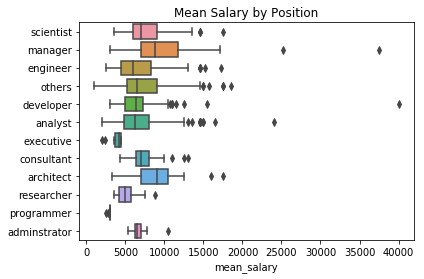

In [85]:
ax = sns.boxplot(x = df['mean_salary'], y = df['position'])
ax.set_ylabel('')
ax.set_title('Mean Salary by Position', y = 1) 

In [86]:
# Create feature postal_district

postal_code = []
for i in df['location']:
    try:
        postal_code.append(i[-6:])
    except:
        postal_code.append(i)

postal_district = []
for i in postal_code:
    i = str(i)
    if i.startswith(('01','02','03','04','05','06')): 
        postal_district.append('district01')
    elif i.startswith(('07','08')):
        postal_district.append('district02')
    elif i.startswith(('14','15','16')):
        postal_district.append('district03')
    elif i.startswith(('09','10')):
        postal_district.append('district04')
    elif i.startswith(('11','12','13')):
        postal_district.append('district05')
    elif i.startswith('17'):
        postal_district.append('district06')
    elif i.startswith(('18','19')):
        postal_district.append('district07')
    elif i.startswith(('20','21')):
        postal_district.append('district08')
    elif i.startswith(('22','23')):
        postal_district.append('district09')
    elif i.startswith(('24','25','26','27')):
        postal_district.append('district10')
    elif i.startswith(('28','29','30')):
        postal_district.append('district11')
    elif i.startswith(('31','32','33')):
        postal_district.append('district12')
    elif i.startswith(('34','35','36', '37')):
        postal_district.append('district13')
    elif i.startswith(('38','39','40','41')):
        postal_district.append('district14')
    elif i.startswith(('42','43','44','45')):
        postal_district.append('district15')
    elif i.startswith(('46','47','48')):
        postal_district.append('district16')
    elif i.startswith(('49','50','81')):
        postal_district.append('district17')
    elif i.startswith(('51','52')):
        postal_district.append('district18')    
    elif i.startswith(('53','54','55','82')):
        postal_district.append('district19')
    elif i.startswith(('56','57')):
        postal_district.append('district20')
    elif i.startswith(('58','59')):
        postal_district.append('district21')
    elif i.startswith(('60','61','62','63','64')):
        postal_district.append('district22')
    elif i.startswith(('65','66','67','68')):
        postal_district.append('district23')
    elif i.startswith(('69','70','71')):
        postal_district.append('district24')
    elif i.startswith(('72','73')):
        postal_district.append('district25')
    elif i.startswith(('77','78')):
        postal_district.append('district26')
    elif i.startswith(('75','76')):
        postal_district.append('district27')
    elif i.startswith(('79','80')):
        postal_district.append('district28')
    else:
        postal_district.append(i)

df['postal_district'] = postal_district

In [87]:
df['postal_district'].value_counts()[:10]

district01    376
nan           223
district05    111
district22     57
district14     56
district02     48
district07     44
district16     36
district09     31
district06     28
Name: postal_district, dtype: int64

In [88]:
df[df['postal_district'].str.contains('China')]

,company,position,job_id,location,employment_type,job_level,job_category,salary,salary_type,role_responsibility,requirement,salary_lower,salary_upper,mean_salary,mean_salary_class,postal_district
608,PIECE FUTURE PTE. LTD.,analyst,JOB-2019-0074101,"Shanghai, China",Full Time,Executive,"Engineering, Professional Services","$2,800to$5,000",Monthly,We are looking for passionate and motivated En...,Min. Bachelor’s / Master’s Degree in electric...,2800.0,5000.0,3900.0,0,China


In [89]:
# Remove row as it is an overseas job posting

df = df.drop(608, axis = 0)

In [90]:
df['postal_district'].value_counts()[:10]

district01    376
nan           223
district05    111
district22     57
district14     56
district02     48
district07     44
district16     36
district09     31
district06     28
Name: postal_district, dtype: int64

Text(0.5, 1, 'Mean Salary by Postal District')

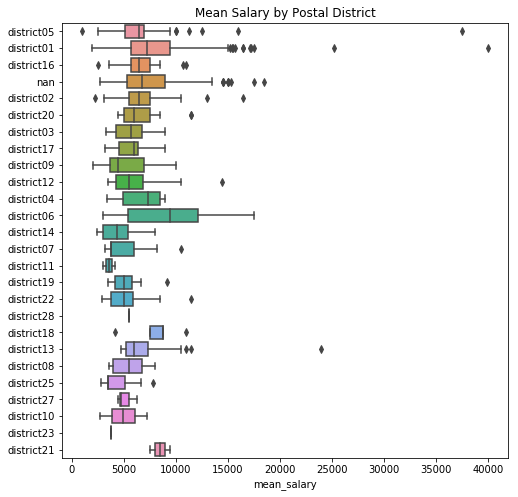

In [91]:
ax = plt.subplots(figsize = (8,8))
ax = sns.boxplot(x = df['mean_salary'], y = df['postal_district'])
ax.set_ylabel('')
ax.set_title('Mean Salary by Postal District', y = 1) 

In [92]:
# Check employment_type

df['employment_type'].value_counts()

Full Time                         385
Permanent                         293
Permanent, Full Time              165
Contract                          128
Contract, Full Time               122
Permanent, Contract                28
Permanent, Contract, Full Time     10
Full Time, Internship               4
Temporary                           3
Part Time, Contract                 3
Permanent, Flexi work               2
Contract, Internship                1
Temporary, Contract, Full Time      1
Internship                          1
Name: employment_type, dtype: int64

In [93]:
df['employment_type'].replace('Permanent, Full Time', 'Permanent', inplace = True)
df['employment_type'].replace('Contract, Full Time', 'Contract', inplace = True)
df['employment_type'].replace('Permanent, Contract, Full Time', 'Permanent, Contract', inplace = True)
df['employment_type'].replace('Full Time, Internship', 'Internship', inplace = True)
df['employment_type'].replace('Part Time, Contract', 'Part Time', inplace = True)
df['employment_type'].replace('Permanent, Flexi work', 'Permanent', inplace = True)
df['employment_type'].replace('Contract, Internship', 'Internship', inplace = True)
df['employment_type'].replace('Temporary, Contract, Full Time', 'Contract', inplace = True)

In [94]:
df['employment_type'].value_counts()

Permanent              460
Full Time              385
Contract               251
Permanent, Contract     38
Internship               6
Part Time                3
Temporary                3
Name: employment_type, dtype: int64

Text(0.5, 1, 'Mean Salary by Employment Type')

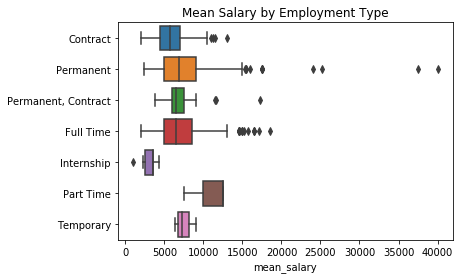

In [95]:
ax = sns.boxplot(x = df['mean_salary'], y = df['employment_type'])
ax.set_ylabel('')
ax.set_title('Mean Salary by Employment Type', y = 1) 

In [96]:
# Check job_level

df['job_level'].value_counts()[:10]

Professional               347
Executive                  223
Senior Executive           135
Middle Management           87
Manager                     68
Junior Executive            51
Senior Management           36
Fresh/entry level           34
Professional, Executive     33
Non-executive               30
Name: job_level, dtype: int64

In [97]:
job_level = [i.split(',',1)[0] for i in df['job_level']]
df['job_level'] = job_level

In [98]:
df['job_level'].value_counts()

Professional         408
Executive            242
Senior Executive     135
Middle Management    106
Manager               81
Junior Executive      53
Fresh/entry level     47
Senior Management     43
Non-executive         31
Name: job_level, dtype: int64

Text(0.5, 1, 'Mean Salary by Employment Type')

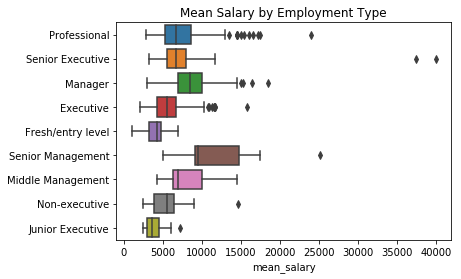

In [99]:
ax = sns.boxplot(x = df['mean_salary'], y = df['job_level'])
ax.set_ylabel('')
ax.set_title('Mean Salary by Employment Type', y = 1) 

In [100]:
# Check job_category

df['job_category'].value_counts()[:10]

Information Technology                            594
Banking and Finance                                93
Engineering                                        84
Sciences / Laboratory / R&D                        50
Information Technology, Public / Civil Service     41
Banking and Finance, Information Technology        31
Others                                             30
Engineering, Sciences / Laboratory / R&D           22
Consulting                                         21
Accounting / Auditing / Taxation                   16
Name: job_category, dtype: int64

In [101]:
job_category = [i.split(',',1)[0] for i in df['job_category']]
df['job_category'] = job_category

In [102]:
df['job_category'].value_counts()[:10]

Information Technology              653
Engineering                         135
Banking and Finance                 130
Sciences / Laboratory / R&D          50
Consulting                           40
Others                               31
Accounting / Auditing / Taxation     21
Education and Training               15
Logistics / Supply Chain             10
Advertising / Media                  10
Name: job_category, dtype: int64

In [103]:
# Check role_responsibility and requirement

df['role_responsibility_requirement'] = df['role_responsibility'] + df['requirement'].fillna('')

Remove stemming as scores became worse with stemming

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

def stem_text(text):
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

df['role_responsibility_requirement'] = df['role_responsibility_requirement'].apply(stem_text)

In [104]:
dummy = pd.get_dummies(df[['position','employment_type','job_level','job_category',
                          'postal_district']], drop_first = True)

data = df[['mean_salary_class','role_responsibility_requirement']]
data = pd.concat([data, dummy], axis = 1)
data.head()

,mean_salary_class,role_responsibility_requirement,position_analyst,position_architect,position_consultant,position_developer,position_engineer,position_executive,position_manager,position_others,...,postal_district_district18,postal_district_district19,postal_district_district20,postal_district_district21,postal_district_district22,postal_district_district23,postal_district_district25,postal_district_district27,postal_district_district28,postal_district_nan
0,0,Post-doctoral Research Fellow (Data Analytics)...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Build models with assistance and perform expl...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Our vision is to build a unified Commercial Di...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Problem solver with curious mindset with a hi...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,"As a Data scientist, you play a key role to so...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
X = data.drop(['mean_salary_class'], axis = 1)
y = data['mean_salary_class']

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [107]:
from nltk.corpus import stopwords 

stop = stopwords.words('english')
stop += ['data','team','work','development','support','working','requirements','strong',
        'job','description','applying','tinto','built','developing','net','ea','licence',
        'mandatory','derivatives','must','expect','file','responsibilities','accordingly',
        'software']

In [108]:
# Use CountVectorizer as TfidfVectorizer produced worse results

from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer(stop_words = stop, ngram_range = (1,3))
cvect_train = cvect.fit_transform(X_train['role_responsibility_requirement'])
cvect_test = cvect.transform(X_test['role_responsibility_requirement'])

In [109]:
def get_freq_words(sparse_counts, columns):
    word_counts = np.asarray(cvect_train.sum(axis = 0)).reshape(-1)
    largest_count_indices = word_counts.argsort()[::-1]
    freq_words = pd.Series(word_counts[largest_count_indices], 
                           index = columns[largest_count_indices])
    return freq_words

In [110]:
freq_words = get_freq_words(cvect_train, np.array(cvect.get_feature_names()))
freq_words[:20]

experience       2805
business         2230
skills           1330
management       1038
project           957
knowledge         948
technical         752
ability           744
design            739
learning          705
solutions         685
good              679
years             670
analysis          660
develop           655
technology        630
systems           618
sql               576
system            568
communication     528
dtype: int64

In [111]:
cvect_train_df = pd.DataFrame(cvect_train.todense(), columns = cvect.get_feature_names())
cvect_test_df = pd.DataFrame(cvect_test.todense(), columns = cvect.get_feature_names())

In [112]:
X_train.drop(['role_responsibility_requirement'], axis = 1, inplace = True)
X_test.drop(['role_responsibility_requirement'], axis = 1, inplace = True)

In [113]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)

In [114]:
cvect_X_train = pd.concat([X_train, cvect_train_df], axis = 1)
cvect_X_test = pd.concat([X_test, cvect_test_df], axis = 1)

In [115]:
cvect_X_train.shape, cvect_X_test.shape, y_train.shape, y_test.shape

((802, 197362), (344, 197362), (802,), (344,))

In [116]:
# Try logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
cv_scores = cross_val_score(lr, cvect_X_train, y_train, cv = 5, scoring = 'roc_auc')

print('Roc-auc scores:', cv_scores)
print('Mean roc-auc score:', np.mean(cv_scores))
print('Standard deviation of roc-auc scores:', np.std(cv_scores))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Roc-auc scores: [0.82073171 0.82309736 0.83731833 0.84841381 0.86396312]
Mean roc-auc score: 0.8387048662329099
Standard deviation of roc-auc scores: 0.016129440343460765


In [129]:
from sklearn.model_selection import GridSearchCV

lr_parameter = {'penalty' : ['l1', 'l2'], 
                'C' : np.linspace(1, 100, 10),
                'solver' : ['liblinear']}

lr_gridsearch = GridSearchCV(lr, lr_parameter, cv = 5, scoring = 'roc_auc')
lr_gridsearch.fit(cvect_X_train, y_train)
gs_score = lr_gridsearch.best_score_

print('Best roc-auc score:', gs_score)

Best roc-auc score: 0.8438425069985817


In [130]:
parameters = lr_gridsearch.best_params_

print('Best parameters:', parameters)

Best parameters: {'C': 89.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [117]:
best_lr = LogisticRegression(penalty = 'l1', C = 89, solver = 'liblinear')
cv_scores = cross_val_score(best_lr, cvect_X_train, y_train, cv = 5, scoring = 'roc_auc')

print('Roc-auc scores:', cv_scores)
print('Mean roc-auc score:', np.mean(cv_scores))
print('Standard deviation of roc-auc scores:', np.std(cv_scores))

Roc-auc scores: [0.85289634 0.82090952 0.83528676 0.82700422 0.85302391]
Mean roc-auc score: 0.8378241503054975
Standard deviation of roc-auc scores: 0.013174351542478889


In [118]:
from sklearn.metrics import roc_auc_score

best_lr.fit(cvect_X_train, y_train)
y_pred_prob_lr = best_lr.predict_proba(cvect_X_test)
score = roc_auc_score(y_test, y_pred_prob_lr[:,1])

print('Roc-auc score:',score)

Roc-auc score: 0.7981325484623973


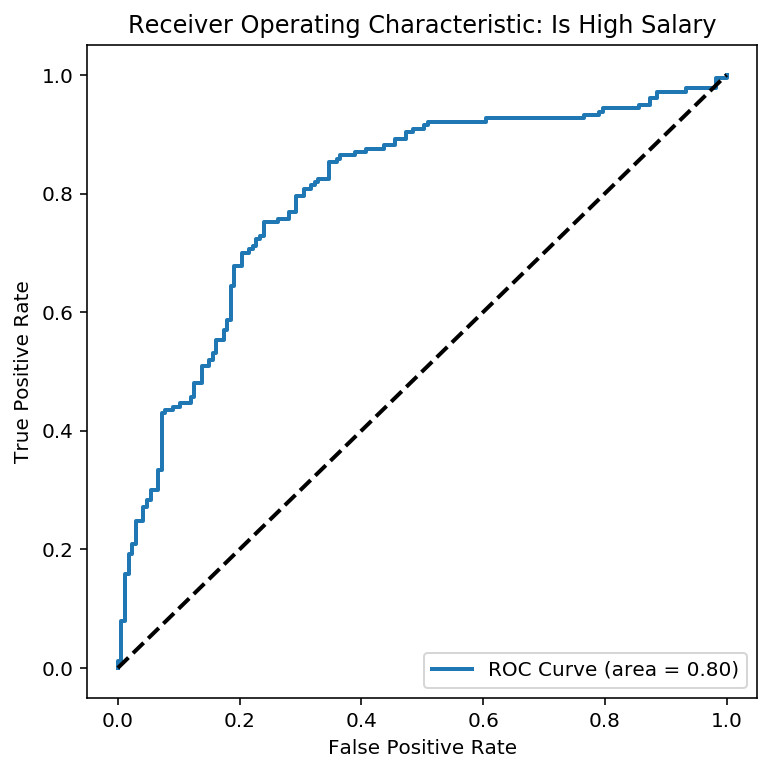

In [119]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lr[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = [6,6])
plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % roc_auc, linewidth = 2)
plt.plot([0, 1], [0, 1], 'k--', linewidth = 2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic: Is High Salary')
plt.legend(loc = "lower right")
plt.show()

In [120]:
from sklearn.metrics import classification_report

y_pred_lr = best_lr.predict(cvect_X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       167
           1       0.77      0.75      0.76       177

   micro avg       0.75      0.75      0.75       344
   macro avg       0.75      0.75      0.75       344
weighted avg       0.75      0.75      0.75       344



In [121]:
from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(y_test, y_pred_lr, labels = [0,1]))
confusion_matrix = pd.DataFrame(conmat, index = ['is_low_salary', 'is_high_salary'],
                                columns = ['predicted_low_salary','predicted_high_salary'])
confusion_matrix

,predicted_low_salary,predicted_high_salary
is_low_salary,127,40
is_high_salary,45,132


In [137]:
# Try naive bayes

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
cv_scores = cross_val_score(mnb, cvect_X_train, y_train, cv = 5, scoring = 'roc_auc')

print('Roc-auc scores:', cv_scores)
print('Mean roc-auc score:', np.mean(cv_scores))
print('Standard deviation of roc-auc scores:', np.std(cv_scores))

Roc-auc scores: [0.79710366 0.83052039 0.79731208 0.8332552  0.8213002 ]
Mean roc-auc score: 0.8158983063283516
Standard deviation of roc-auc scores: 0.015766636606346335


In [138]:
# Try knn

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cv_scores = cross_val_score(knn, cvect_X_train, y_train, cv = 5, scoring = 'roc_auc')

print('Roc-auc scores:', cv_scores)
print('Mean roc-auc score:', np.mean(cv_scores))
print('Standard deviation of roc-auc scores:', np.std(cv_scores))

Roc-auc scores: [0.68833841 0.667995   0.68713862 0.70596968 0.67698078]
Mean roc-auc score: 0.6852844980541929
Standard deviation of roc-auc scores: 0.012716285280726224


In [139]:
# Try Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
cv_scores = cross_val_score(rf, cvect_X_train, y_train, cv = 5, scoring = 'roc_auc')

print('Roc-auc scores:', cv_scores)
print('Mean roc-auc score:', np.mean(cv_scores))
print('Standard deviation of roc-auc scores:', np.std(cv_scores))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

Roc-auc scores: [0.75868902 0.75863416 0.83270824 0.78418503 0.82473824]
Mean roc-auc score: 0.7917909381801271
Standard deviation of roc-auc scores: 0.031662938397582635


In [136]:
# Logistic regression model is selected as it has the highest roc-auc score.

best_lr_df = pd.DataFrame(best_lr.coef_, columns = (cvect_X_train.columns)).T
best_lr_df.columns = ['coef']
best_lr_df['odds ratio'] = best_lr_df['coef'].apply(lambda x : np.exp(x))
best_lr_df = best_lr_df.sort_values(by = ['odds ratio'], ascending = False)
best_lr_df.head()

,coef,odds ratio
job_level_Senior Executive,5.110839,165.809453
banking domain,3.383835,29.483613
technical experience,3.370385,29.089718
job_level_Manager,3.193613,24.376331
financial reporting,2.736157,15.427581


Top 5 factors that impact salary:
Senior executive level jobs are 166 times more likely to get high salary.
Jobs in the banking sector are 29 times more likely to get high salary.
People with technical experience are 29 times more likely to get high salary.
Manager level jobs are 24 times more likely to get high salary.
Jobs requiring financial reporting are 15 times more likely to get high salary.

Question 2: 
Investigate factors that distinguish analyst from other data jobs

In [122]:
new_data = df[['position','mean_salary','employment_type','job_level','job_category',
               'postal_district','role_responsibility_requirement']]
new_data['position'] = new_data['position'].map(lambda x : 1 if x == 'analyst' else 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
# Baseline

new_data['position'].value_counts()/len(new_data)

0    0.667539
1    0.332461
Name: position, dtype: float64

In [124]:
new_dummy = pd.get_dummies(new_data[['employment_type','job_level','job_category',
                          'postal_district']], drop_first = True)
new_data = pd.concat([new_data, new_dummy], axis = 1)
new_data.drop(['employment_type','job_level','job_category','postal_district'], axis = 1,
              inplace = True)

In [125]:
Xn = new_data.drop(['position'], axis = 1)
yn = new_data['position']

In [126]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, stratify = yn, train_size = 0.7, 
                                                        random_state = 42)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [99]:
#stop = stopwords.words('english')
#stop += ['data','team','work','development','support','working','requirements','strong',
#        'analyst','user','requirement','specifications','system','gathering','functional',
#        'skills','role','users']

In [127]:
vect = CountVectorizer(stop_words = stop, ngram_range = (1,3))
vect_train = vect.fit_transform(Xn_train['role_responsibility_requirement'])
vect_test = vect.transform(Xn_test['role_responsibility_requirement'])

In [128]:
def get_freq_words(sparse_counts, columns):
    word_counts = np.asarray(vect_train.sum(axis = 0)).reshape(-1)
    largest_count_indices = word_counts.argsort()[::-1]
    freq_words = pd.Series(word_counts[largest_count_indices], 
                           index = columns[largest_count_indices])
    return freq_words

In [129]:
freq_words = get_freq_words(vect_train, np.array(vect.get_feature_names()))
freq_words[:20]

experience    2784
business      2370
skills        1370
management    1037
project        974
knowledge      960
technical      768
ability        745
design         715
years          713
learning       705
analysis       701
good           689
solutions      683
systems        653
develop        641
technology     612
sql            574
system         561
science        539
dtype: int64

In [130]:
vect_train_df = pd.DataFrame(vect_train.todense(), columns = vect.get_feature_names())
vect_test_df = pd.DataFrame(vect_test.todense(), columns = vect.get_feature_names())

In [131]:
Xn_train.drop(['role_responsibility_requirement'], axis = 1, inplace = True)
Xn_test.drop(['role_responsibility_requirement'], axis = 1, inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [132]:
Xn_train.reset_index(drop = True, inplace = True)
Xn_test.reset_index(drop = True, inplace = True)

In [133]:
vect_X_train = pd.concat([Xn_train, vect_train_df], axis = 1)
vect_X_test = pd.concat([Xn_test, vect_test_df], axis = 1)

In [134]:
vect_X_train.shape, vect_X_test.shape, yn_train.shape, yn_test.shape

((802, 204703), (344, 204703), (802,), (344,))

In [135]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
smt_vect_X_train, smt_yn_train = smt.fit_sample(vect_X_train, yn_train)

In [136]:
smt_vect_X_train.shape, vect_X_test.shape, smt_yn_train.shape, yn_test.shape

((1070, 204703), (344, 204703), (1070,), (344,))

In [82]:
# Try Logistic Regression

In [106]:
lr = LogisticRegression()
lr.fit(smt_vect_X_train, smt_yn_train)
yn_pred_lr = lr.predict(vect_X_test)
roc_auc_score(yn_test, yn_pred_lr)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8642639206712434

In [107]:
# Try KNN

In [108]:
knn = KNeighborsClassifier()
knn.fit(smt_vect_X_train, smt_yn_train)
yn_pred_knn = knn.predict(vect_X_test)
roc_auc_score(yn_test, yn_pred_knn)

0.5839816933638444

In [109]:
# Try Random Forest

In [110]:
rf = RandomForestClassifier()
rf.fit(smt_vect_X_train, smt_yn_train)
yn_pred_rf = rf.predict(vect_X_test)
roc_auc_score(yn_test, yn_pred_rf)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7062547673531656

In [111]:
# Try SVM

In [112]:
svm = SVC()
svm.fit(smt_vect_X_train, smt_yn_train)
yn_pred_svm = svm.predict(vect_X_test)
roc_auc_score(yn_test, yn_pred_svm)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5503432494279177

In [113]:
# Try Naive Bayes

In [114]:
mnb = MultinomialNB()
mnb.fit(smt_vect_X_train, smt_yn_train)
yn_pred_mnb = mnb.predict(vect_X_test)
roc_auc_score(yn_test, yn_pred_mnb)

0.840465293668955

In [115]:
# Try Logistic Regression with GridSearch

In [116]:
lr_param = {'penalty' : ['l1', 'l2'], 
            'C' : np.linspace(10,200,20), 
            'solver' : ['liblinear']}

new_lr_gridsearcher = GridSearchCV(LogisticRegression(), lr_param, scoring = 'roc_auc', 
                                   cv = 5, verbose = 1)
new_lr_gridsearcher.fit(smt_vect_X_train, smt_yn_train)
new_lr_gridsearcher.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 18.1min finished


0.9760328412961831

In [117]:
# Try Ensemble

In [118]:
voting = VotingClassifier(estimators = [('lr', lr), ('knn', knn), ('rf', rf), ('svm', svm),
                                         ('mnb', mnb)], voting = 'hard')
voting.fit(smt_vect_X_train, smt_yn_train)
yn_pred_voting = voting.predict(vect_X_test)
roc_auc_score(yn_test, yn_pred_voting)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.84023646071701

In [119]:
# Logistic Regression with GridSearch model is selected

In [120]:
new_lr_gridsearcher.best_params_

{'C': 20.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [121]:
new_best_lr = new_lr_gridsearcher.best_estimator_
new_best_lr.score(vect_X_test, yn_test)

0.8808139534883721

In [122]:
new_best_lr_df = pd.DataFrame(new_best_lr.coef_, columns = (vect_X_train.columns)).T
new_best_lr_df.columns = ['coef']
new_best_lr_df['odds ratio'] = new_best_lr_df['coef'].apply(lambda x : np.exp(x))
new_best_lr_df = new_best_lr_df.sort_values(by = ['odds ratio'], ascending = False)
new_best_lr_df.head()

,coef,odds ratio
job_level_Professional,0.970158,2.638361
business,0.685000,1.983771
employment_type_Full Time,0.660489,1.935739
banking,0.542728,1.720695
stakeholders,0.478592,1.613801


In [123]:
# Top 5 factors that distinguish analyst:
# Professional level jobs are 2.64 times more likely to be an analyst.
# Jobs in the business sector are 1.98 times more likely to be an analyst.
# Full time jobs are 1.94 times more likely to be an analyst.
# Jobs in the banking sector are 1.72 times more likely to be an analyst.
# Jobs requiring interaction with stakeholders are 1.61 times more likely to be an analyst.

In [124]:
# Bonus Question

In [125]:
# Get predicted classes

In [137]:
y_pred = best_lr.predict(cvect_X_test)
pred = pd.DataFrame(y_pred, columns = ['y_pred'])
pred.head()

,y_pred
0,1
1,1
2,1
3,1
4,1


In [227]:
# Get predicted probabilities

In [228]:
y_pred_prob = best_lr.predict_proba(cvect_X_test)
prob = pd.DataFrame(y_pred_prob, columns = ['low_salary','high_salary'])
prob.head()

,low_salary,high_salary
0,0.019396,0.980604
1,0.000150,0.999850
2,0.001069,0.998931
3,0.019441,0.980559
4,0.000007,0.999993


In [229]:
# Find the number of false positives based on selected model

In [230]:
from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(y_test, y_pred, labels = [0,1]))
confusion = pd.DataFrame(conmat, index = ['is_low', 'is_high'],
                         columns = ['predicted_low','predicted_high'])
confusion

,predicted_low,predicted_high
is_low,120,47
is_high,43,134


In [231]:
# Iterate through the probability threshold and find the respective number of false positives

In [232]:
for i in np.arange(0.5,1,0.01):
    label = np.array([1 if x >= i else 0 for x in prob['high_salary'].values])
    fp = np.sum((y_test.values == 0) & (label == 1))
    print('threshold:{}, false positive:{}'.format(i,fp))

threshold:0.5, false positive:47
threshold:0.51, false positive:47
threshold:0.52, false positive:47
threshold:0.53, false positive:47
threshold:0.54, false positive:47
threshold:0.55, false positive:47
threshold:0.56, false positive:47
threshold:0.5700000000000001, false positive:45
threshold:0.5800000000000001, false positive:45
threshold:0.5900000000000001, false positive:45
threshold:0.6000000000000001, false positive:45
threshold:0.6100000000000001, false positive:45
threshold:0.6200000000000001, false positive:45
threshold:0.6300000000000001, false positive:45
threshold:0.6400000000000001, false positive:44
threshold:0.6500000000000001, false positive:44
threshold:0.6600000000000001, false positive:44
threshold:0.6700000000000002, false positive:44
threshold:0.6800000000000002, false positive:44
threshold:0.6900000000000002, false positive:43
threshold:0.7000000000000002, false positive:43
threshold:0.7100000000000002, false positive:43
threshold:0.7200000000000002, false positiv

In [233]:
# Set the probability threshold to be higher than 0.5, for example 0.91, and update the 
# predicted classes based on this new threshold

In [240]:
pred['prob_high'] = prob['high_salary']
pred['updated_y_pred'] = [1 if i >= 0.91 else 0 for i in pred['prob_high']]
pred.head()

,y_pred,prob_high,updated_y_pred
0,1,0.980604,1
1,1,0.999850,1
2,1,0.998931,1
3,1,0.980559,1
4,1,0.999993,1


In [241]:
# Check the updated number of false positives

In [242]:
new_conmat = np.array(confusion_matrix(y_test, pred['updated_y_pred'], labels = [0,1]))
new_confusion = pd.DataFrame(new_conmat, index = ['is_low', 'is_high'],
                             columns = ['predicted_low','predicted_high'])
new_confusion

,predicted_low,predicted_high
is_low,132,35
is_high,64,113


In [237]:
# Conclusion:
# Reducing the number of false positives will decrease the number of true positives and 
# increase the number of false negatives.

In [243]:
# Plot the ROC curve

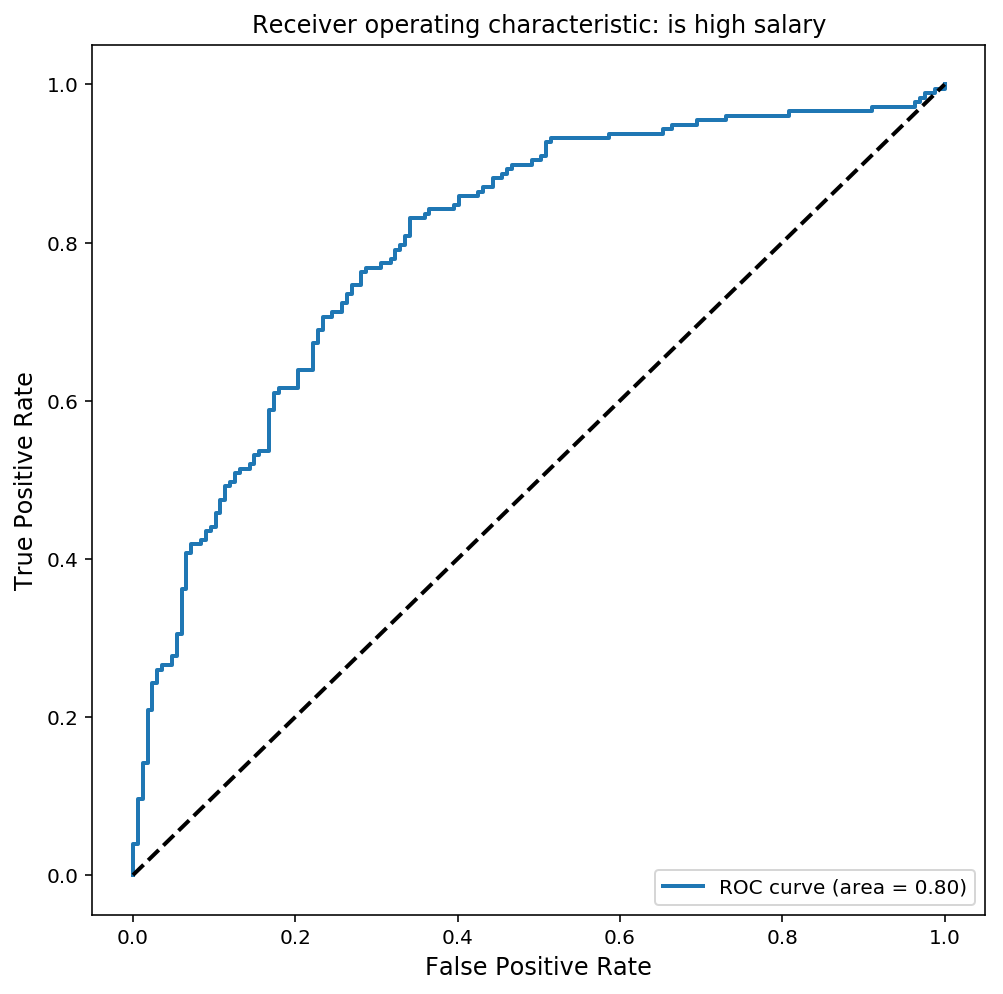

In [244]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = [8,8])
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % roc_auc, linewidth = 2)
plt.plot([0, 1], [0, 1], 'k--', linewidth = 2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.title('Receiver operating characteristic: is high salary', fontsize = 12)
plt.legend(loc = "lower right")
plt.show()

In [140]:
# Executive Summary:

# Data consisted of company, position, job id, location, employment type, job level, 
# minimum experience, job category, salary, salary type, role, responsibility and requirement.

# Question 1 - Investigate factors that distinguish high salary jobs from low salary jobs
# The monthly median salary, $6500, is used to distinguish between high salary jobs and
# low salary jobs. High salary jobs are defined to have a salary of $6500 or more. Low salary
# jobs are defined to have a salary of less than $6500. 
# Positions were categorised into analyst, engineer, developer, scientist, researcher, manager, 
# consultant, architect, programmer, adminstrator and executive. Positions that did not fall 
# into any of the above-mentioned categories were categorised as others. 
# Locations were based on postal district. 
# Employment types were categorised into permanent, full time, contract, permanent with 
# contract, intership, part time and temporary.
# Job levels were categorised into professional, executive, senior executive, middle management,
# manager, junior executive, fresh/entry level, senior management and non-executive. For jobs 
# having more than 1 job level category, only the first job level category was considered as
# the first job level category was deemed to be the most important.
# Minimum experience was not considered due to insufficient data.   
# For job categories having more than 1 job industry, only the first job industry was 
# considered as the first job industry was deemed to be the most important.
# Model has an auc score of 0.85 and an accuracy score of 0.74.
# Top 5 factors that impact salary:
# 1. Senior executive level jobs are 702 times more likely to get high salary.
# 2. Jobs requiring technical experience are 78 times more likely to get high salary.
# 3. Jobs in the banking sector are 62 times more likely to get high salary.
# 4. Manager level jobs are 59 times more likely to get high salary.
# 5. People with 10 years of experience are 27 times more likely to get high salary.
    
# Question 2 - Investigate factors that distinguish analyst from other data jobs
# Model has an auc score of 0.98 and an accuracy score of 0.88.     
# Top 5 factors that distinguish analyst:
# 1. Professional level jobs are 2.64 times more likely to be an analyst.
# 2. Jobs in the business sector are 1.98 times more likely to be an analyst.
# 3. Full time jobs are 1.94 times more likely to be an analyst.
# 4. Jobs in the banking sector are 1.72 times more likely to be an analyst.
# 5. Jobs requiring interaction with stakeholders are 1.61 times more likely to be an analyst.   

# Bonus Question - Tell a client incorrectly that they would get a low salary job than tell 
# a client incorrectly that they would get a high salary job 
# Do so by reducing the number of false positives. 
# Tradeoffs are a decrease in the number of true positives (tell a client correctly that they
# would get a high salary job) and an increase in the number of false negatives (tell a client
# incorrectly that they would get a low salary job).

# Limitations:
# 1. Findings only applicable to data related jobs in Singapore.
# 2. Findings only applicable for the near future, not an accurate reflection of job seeking
# in the distant future like 10 years later.